In [20]:
# Import all the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [21]:
# Load the dataset
df = pd.read_csv(r'C:\Users\SIMRAN KHANNA\Downloads\breast-cancer.csv')

In [22]:
# Preprocess the data
le = LabelEncoder()
df['diagnosis'] = le.fit_transform(df['diagnosis'])

In [23]:
# Split the data into features (X) and target (y)
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

In [24]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# Define machine learning models
models = [
    LogisticRegression(max_iter=10000, random_state=42),
    DecisionTreeClassifier(random_state=42),
    RandomForestClassifier(n_estimators=100, random_state=42)
]

In [26]:
# Train and evaluate each model
for model in models:
    model_name = model.__class__.__name__
    print(f"Training {model_name} model...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

Training LogisticRegression model...
Training DecisionTreeClassifier model...
Training RandomForestClassifier model...


In [27]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [28]:
print(f"{model_name} model evaluation metrics:")
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 score: {f1:.3f}")
print()

RandomForestClassifier model evaluation metrics:
Accuracy: 0.965
Precision: 0.976
Recall: 0.930
F1 score: 0.952



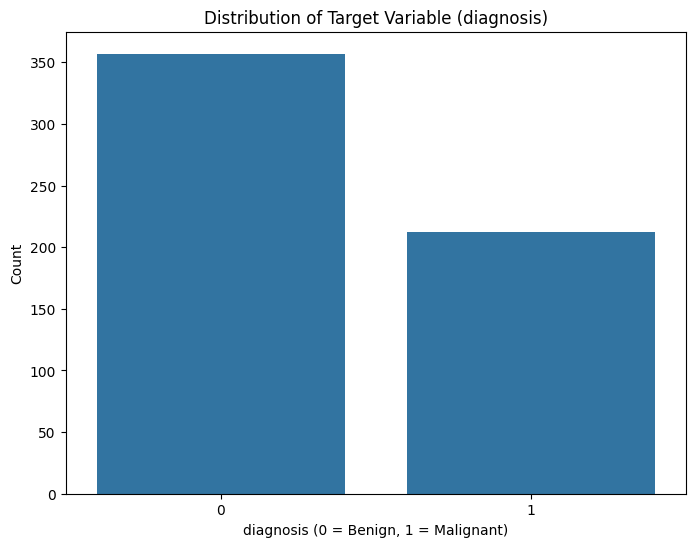

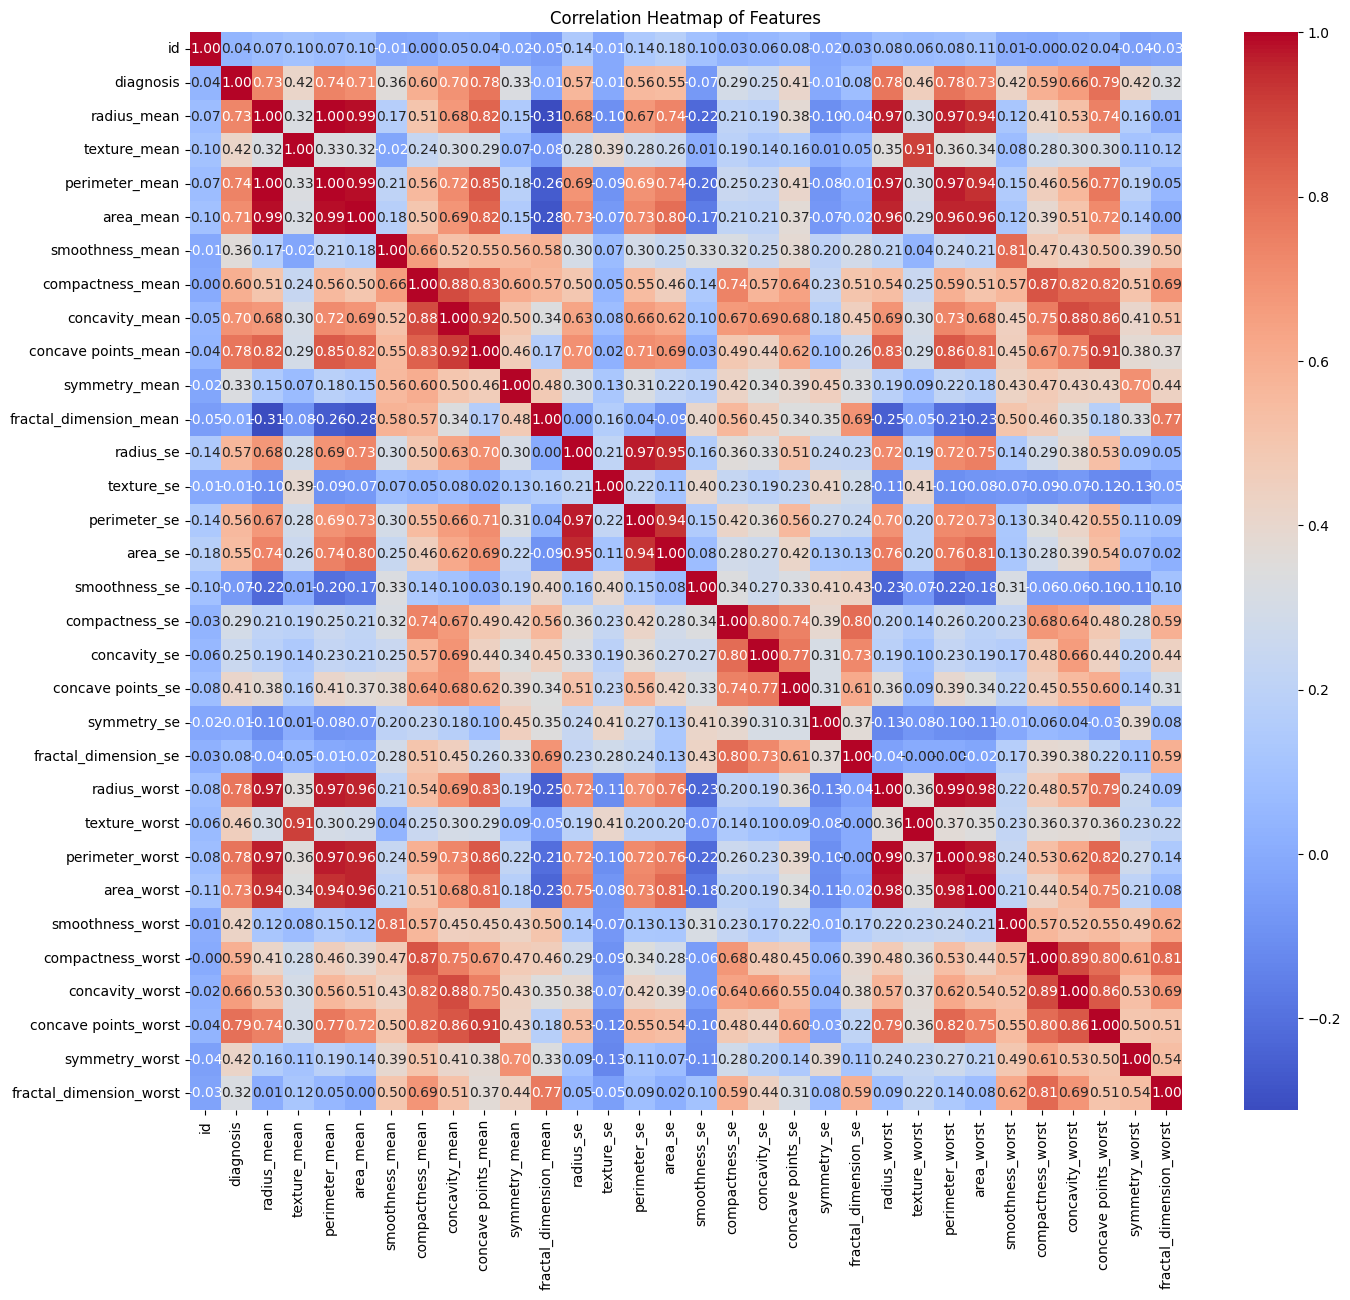

In [29]:
# Visualization 1: Distribution of the target variable (diagnosis)
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='diagnosis')
plt.title('Distribution of Target Variable (diagnosis)')
plt.xlabel('diagnosis (0 = Benign, 1 = Malignant)')
plt.ylabel('Count')
plt.show()

# Visualization 2: Correlation heatmap of the features
plt.figure(figsize=(16, 14))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap of Features')
plt.show()